In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
#pd.set_option('display.max_rows', 1000)

In [3]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [6]:
from sqlalchemy import create_engine
engine = create_engine("postgres://" + os.environ.get("POSTGRES_USER") + ":" + os.environ.get("POSTGRES_PASSWORD") + "@" + "airflow-aws.coqoinqxklrf.us-east-1.rds.amazonaws.com:5432/postgres")

TypeError: can only concatenate str (not "NoneType") to str

In [79]:
df = pd.read_sql('select * from amazon.amazon_purchases', con=engine)
df

,order_id,order_date,category,website,condition,seller,list_price_per_unit,purchase_price_per_unit,quantity,shipment_date,carrier_name,item_subtotal,item_subtotal_tax,item_total
0,1,2008-02-19,BOOKS,Amazon.com,None,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79
1,2,2008-02-19,BOOKS,Amazon.com,None,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45
2,3,2008-06-03,BOOKS,Amazon.com,None,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09
3,4,2008-11-06,HEALTH_BEAUTY,Amazon.com,None,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39
4,5,2008-11-06,HEALTH_BEAUTY,Amazon.com,None,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,972,2019-12-18,OTHER,Amazon.com,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85
779,973,2019-12-19,GIFT_CARD,Amazon.com,new,Amazon.com,50.00,200.00,1,2019-12-19,None,200.00,0.00,200.00
780,974,2019-12-24,HEALTH_BEAUTY,Amazon.com,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18
781,976,2020-01-01,HEALTH_BEAUTY,Amazon.com,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54


In [80]:
df.dtypes

order_id                     int64
order_date                  object
category                    object
website                     object
condition                   object
seller                      object
list_price_per_unit        float64
purchase_price_per_unit    float64
quantity                     int64
shipment_date               object
carrier_name                object
item_subtotal              float64
item_subtotal_tax          float64
item_total                 float64
dtype: object

In [81]:
# Rename columns
df.columns = ['order_id', 'order_date', 'category', 'website', 'condition', 'seller', 'list_price_per_unit', 'purchase_price_per_unit', 'quantity', 'shipment_date', 'carrier_name', 'item_subtotal', 'item_subtotal_tax','item_total']

In [82]:
# Change date columns from string/object to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['shipment_date'] = pd.to_datetime(df['shipment_date'])

In [83]:
df

,order_id,order_date,category,website,condition,seller,list_price_per_unit,purchase_price_per_unit,quantity,shipment_date,carrier_name,item_subtotal,item_subtotal_tax,item_total
0,1,2008-02-19,BOOKS,Amazon.com,None,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79
1,2,2008-02-19,BOOKS,Amazon.com,None,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45
2,3,2008-06-03,BOOKS,Amazon.com,None,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09
3,4,2008-11-06,HEALTH_BEAUTY,Amazon.com,None,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39
4,5,2008-11-06,HEALTH_BEAUTY,Amazon.com,None,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,972,2019-12-18,OTHER,Amazon.com,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85
779,973,2019-12-19,GIFT_CARD,Amazon.com,new,Amazon.com,50.00,200.00,1,2019-12-19,None,200.00,0.00,200.00
780,974,2019-12-24,HEALTH_BEAUTY,Amazon.com,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18
781,976,2020-01-01,HEALTH_BEAUTY,Amazon.com,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54


In [84]:
df.dtypes

order_id                            int64
order_date                 datetime64[ns]
category                           object
website                            object
condition                          object
seller                             object
list_price_per_unit               float64
purchase_price_per_unit           float64
quantity                            int64
shipment_date              datetime64[ns]
carrier_name                       object
item_subtotal                     float64
item_subtotal_tax                 float64
item_total                        float64
dtype: object

# The following exercises will be done using SQL simply to demonstrate Postgres integration

In [85]:
# Needed to connect Python to Postgres
connection = engine.connect()

### Total Spend 2008 - 2019

In [86]:
# Needed for every SQL query
con_total_spend = connection.execute('SELECT round(sum(item_total)) FROM amazon.amazon_purchases')

In [87]:
data_con_total_spend = [row for row in con_total_spend]
df_con_total_spend = pd.DataFrame.from_records(data_con_total_spend)
df_con_total_spend.columns = ['Total Spend 2008/01 - 2019/12']
df_con_total_spend

,Total Spend 2008/01 - 2019/12
0,30392


In [88]:
con_avg_spend = connection.execute('SELECT round(avg(item_total)) FROM amazon.amazon_purchases')

In [89]:
data_con_avg_spend = [row for row in con_avg_spend]
df_con_avg_spend = pd.DataFrame.from_records(data_con_avg_spend)
df_con_avg_spend.columns = ['Average Spend 2008/01 - 2019/12']
df_con_avg_spend

,Average Spend 2008/01 - 2019/12
0,39


### Total Spend by Year

In [90]:
con_total_spend_yr = connection.execute('''
SELECT extract(year from order_date), round(sum(item_total))
FROM amazon.amazon_purchases
GROUP BY extract(year from order_date)
ORDER BY extract(year from order_date)
''')
                                        
data_con_total_spend_yr = [row for row in con_total_spend_yr]
df_con_total_spend_yr = pd.DataFrame.from_records(data_con_total_spend_yr)
df_con_total_spend_yr.columns = ['Year','Annual Total Spend']
#df_con_total_spend_yr['Year'] = pd.to_datetime(df_con_total_spend_yr['Year'], format="%Y")
df_con_total_spend_yr['Year'] = df_con_total_spend_yr['Year'].astype(int)
df_con_total_spend_yr['Annual Total Spend'] = df_con_total_spend_yr['Annual Total Spend'].astype(int)
#df_con_total_spend_yr

In [91]:
#df_con_total_spend_yr.dtypes

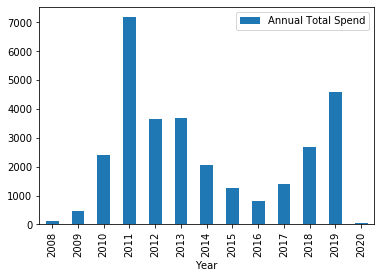

In [92]:
plot_df_con_total_spend_yr = df_con_total_spend_yr.plot.bar(x=0, y=1, rot = 90)
plt.savefig('ann_tot_spend.png')
ann_tot_spend = 'ann_tot_spend.png'

### Total Spend by Category

In [93]:
con_total_spend_cat = connection.execute('''
SELECT category, round(sum(item_total))
FROM amazon.amazon_purchases
GROUP BY category
ORDER BY sum(item_total) desc
''')
                                        
data_con_total_spend_cat = [row for row in con_total_spend_cat]
df_con_total_spend_cat = pd.DataFrame.from_records(data_con_total_spend_cat)
df_con_total_spend_cat.columns = ['Category','Total Spend']
df_con_total_spend_cat['Total Spend'] = df_con_total_spend_cat['Total Spend'].astype(int)
#df_con_total_spend_cat

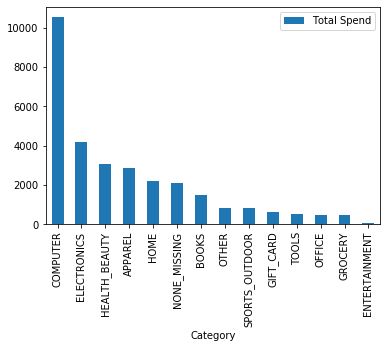

In [94]:
plot_df_con_total_spend_cat = df_con_total_spend_cat.plot.bar(x=0, y=1, rot = 90)
plt.savefig('cat_tot_spend.png')
cat_tot_spend = 'cat_tot_spend.png'

In [95]:
con_seller_share = connection.execute('''
(SELECT seller, count(*) 
FROM amazon.amazon_purchases
WHERE seller = 'Amazon.com'
GROUP BY seller)
UNION ALL
SELECT 'Other', count(*)
FROM amazon.amazon_purchases
WHERE seller != 'Amazon.com'
''')
                                        
data_con_seller_share = [row for row in con_seller_share]
df_con_seller_share = pd.DataFrame.from_records(data_con_seller_share)
df_con_seller_share.columns = ['Seller','Transactions']
df_con_seller_share.set_index('Seller',inplace=True)
df_con_seller_share

,Transactions
Seller,
Amazon.com,454
Other,318


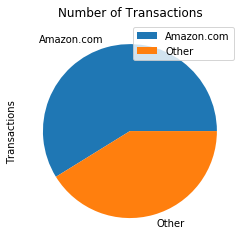

In [96]:
df_con_seller_share.plot(kind='pie', x=0, y=0)
plt.title('Number of Transactions')
labels = ['Amazon','Other']


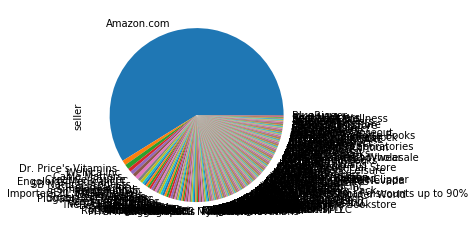

In [97]:
df['seller'].value_counts().plot(kind='pie')

In [98]:
df['seller'].value_counts()

Amazon.com              454
Dr. Price's Vitamins      7
Wellica Inc               7
Cable Matters             5
Creative Square           5
                       ... 
Best Nest Wellness        1
Spotless Lens             1
MKOAWA                    1
Book_Holders              1
BlueRigger                1
Name: seller, Length: 226, dtype: int64

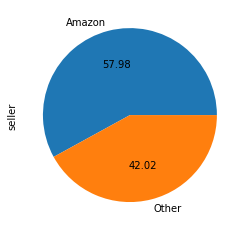

In [99]:
df['seller'].eq('Amazon.com').value_counts(normalize=True).plot.pie(labels=['Amazon','Other'], autopct='%.2f')
plt.savefig('pie_seller.png')
pie_seller = 'pie_seller.png'

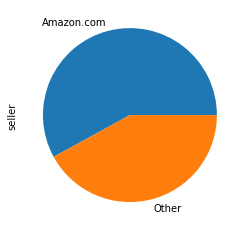

In [100]:
df['seller'].apply(lambda x:x if x=='Amazon.com' else 'Other').value_counts().plot(kind='pie')

### Carriers

In [101]:
con_car = connection.execute('''
SELECT carrier_name, count(*)
FROM amazon.amazon_purchases
GROUP BY carrier_name
ORDER BY count desc
LIMIT 10
''')
                                        
data_con_car = [row for row in con_car]
df_con_car = pd.DataFrame.from_records(data_con_car)
df_con_car.columns = ['Carrier','Number of Shipments']
#df_con_car

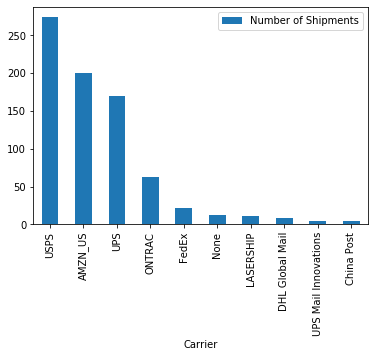

In [102]:
plot_df_con_car = df_con_car.plot.bar(x=0, y=1, rot = 90)
plt.savefig('carrier_num.png')
carrier_num = 'carrier_num.png'

In [103]:
con_car_avg = connection.execute('''
SELECT carrier_name, round(avg(item_total))
FROM amazon.amazon_purchases
GROUP BY carrier_name
ORDER BY round desc
LIMIT 10
''')
                                        
data_con_car_avg = [row for row in con_car_avg]
df_con_car_avg = pd.DataFrame.from_records(data_con_car_avg)
df_con_car_avg.columns = ['Carrier','Average Price of Item']
df_con_car_avg['Average Price of Item'] = df_con_car_avg['Average Price of Item'].astype(int)
df_con_car_avg

,Carrier,Average Price of Item
0,FedEx,89
1,UPS,64
2,None,61
3,DHL,52
4,ONTRAC,49
5,FedEx SmartPost,40
6,AMZN_US,33
7,LASERSHIP,25
8,USPS,24
9,UPS Mail Innovations,12


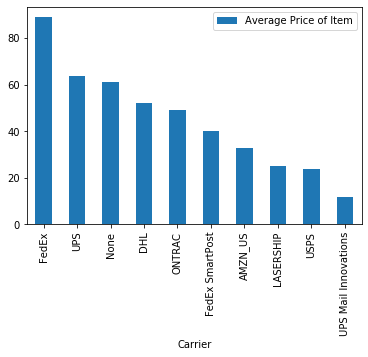

In [104]:
plot_df_con_car_avg = df_con_car_avg.plot.bar(x=0, y=1, rot = 90)
plt.savefig('carrier_price.png')
carrier_price = 'carrier_price.png'

In [105]:
# Recall my average spend
df_con_avg_spend

,Average Spend 2008/01 - 2019/12
0,39


### Trend Lines

In [106]:
con_month_trend = connection.execute('''
SELECT extract(year from order_date) as year, extract(month from order_date) as month, count(*)
FROM amazon.amazon_purchases
GROUP BY year, month
ORDER BY year, month
''')
                                        
data_con_month_trend = [row for row in con_month_trend]
df_con_month_trend = pd.DataFrame.from_records(data_con_month_trend)
df_con_month_trend.columns = ['Year','Month', 'Count']
df_con_month_trend['Year'] = df_con_month_trend['Year'].astype(int)
df_con_month_trend['Month'] = df_con_month_trend['Month'].astype(int)
df_con_month_trend['Count'] = df_con_month_trend['Count'].astype(int)
df_con_month_trend

,Year,Month,Count
0,2008,2,2
1,2008,6,1
2,2008,11,4
3,2008,12,2
4,2009,7,1
...,...,...,...
98,2019,9,8
99,2019,10,5
100,2019,11,5
101,2019,12,9


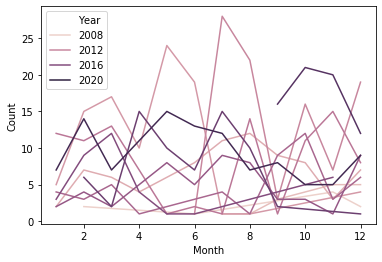

In [107]:
plot_con_month_trend = sns.lineplot(data=df_con_month_trend, x='Month', y='Count', hue='Year')
plt.savefig('month_trend.png')
month_trend = 'month_trend.png'

# Revert to using Pandas without SQL

In [108]:
df

,order_id,order_date,category,website,condition,seller,list_price_per_unit,purchase_price_per_unit,quantity,shipment_date,carrier_name,item_subtotal,item_subtotal_tax,item_total
0,1,2008-02-19,BOOKS,Amazon.com,None,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79
1,2,2008-02-19,BOOKS,Amazon.com,None,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45
2,3,2008-06-03,BOOKS,Amazon.com,None,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09
3,4,2008-11-06,HEALTH_BEAUTY,Amazon.com,None,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39
4,5,2008-11-06,HEALTH_BEAUTY,Amazon.com,None,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,972,2019-12-18,OTHER,Amazon.com,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85
779,973,2019-12-19,GIFT_CARD,Amazon.com,new,Amazon.com,50.00,200.00,1,2019-12-19,None,200.00,0.00,200.00
780,974,2019-12-24,HEALTH_BEAUTY,Amazon.com,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18
781,976,2020-01-01,HEALTH_BEAUTY,Amazon.com,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54


In [109]:
# Total spending
df['item_total'].sum()

30391.82

In [110]:
# Average item total
df['item_total'].mean()

38.8145849297574

In [111]:
# Summary stats of item_total
pd.DataFrame(df.item_total.describe())
#df['item_total'].describe()

,item_total
count,783.000000
mean,38.814585
std,73.652862
min,0.010000
25%,9.655000
50%,16.120000
75%,36.620000
max,740.700000


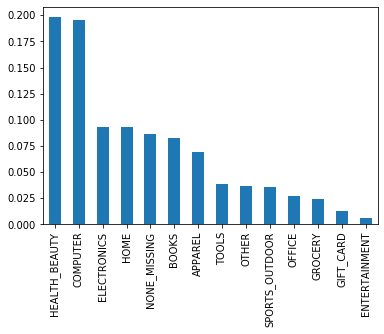

In [112]:
# Percentage of item purchases by count
df['category'].value_counts(normalize=True).plot(kind='bar',title='')
plt.savefig('share_purchase.png')
share_purchase = 'share_purchase.png'

In [113]:
# Order Time
#df_ship_diff = pd.DataFrame()
df_ship_diff = df.copy()[['order_date']]
df_ship_diff['shipment_days'] = df['shipment_date'] - df['order_date']
df_ship_diff['seller'] = df['seller']
df_ship_diff

,order_date,shipment_days,seller
0,2008-02-19,6 days,Amazon.com
1,2008-02-19,6 days,Amazon.com
2,2008-06-03,1 days,Amazon.com
3,2008-11-06,1 days,SimplyBeautiful
4,2008-11-06,1 days,SimplyBeautiful
...,...,...,...
778,2019-12-18,1 days,TORRAS¬Æ
779,2019-12-19,0 days,Amazon.com
780,2019-12-24,2 days,Amazon.com
781,2020-01-01,2 days,Amazon.com


In [114]:
df_ship_diff['shipment_days'].describe()

count                       783
mean     1 days 02:56:33.103448
std      1 days 06:30:55.901447
min             0 days 00:00:00
25%             0 days 00:00:00
50%             1 days 00:00:00
75%             1 days 00:00:00
max            12 days 00:00:00
Name: shipment_days, dtype: object

In [115]:
df_ship_diff.dtypes

order_date        datetime64[ns]
shipment_days    timedelta64[ns]
seller                    object
dtype: object

In [116]:
df_ship_diff['shipment_days'] = df_ship_diff['shipment_days'].astype(str)
df_ship_diff['shipment_days'] = df_ship_diff['shipment_days'].str[0:1]
df_ship_diff['shipment_days'] = df_ship_diff['shipment_days'].astype(int)
df_ship_diff

,order_date,shipment_days,seller
0,2008-02-19,6,Amazon.com
1,2008-02-19,6,Amazon.com
2,2008-06-03,1,Amazon.com
3,2008-11-06,1,SimplyBeautiful
4,2008-11-06,1,SimplyBeautiful
...,...,...,...
778,2019-12-18,1,TORRAS¬Æ
779,2019-12-19,0,Amazon.com
780,2019-12-24,2,Amazon.com
781,2020-01-01,2,Amazon.com


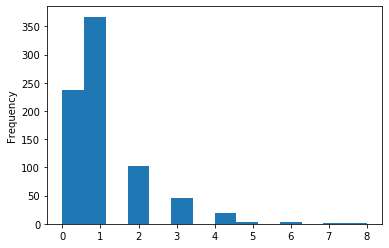

In [117]:
df_ship_diff['shipment_days'].plot(kind='hist', bins = 14)
plt.savefig('ship_diff_all_bar.png')
ship_diff_all_bar = 'ship_diff_all_bar.png'

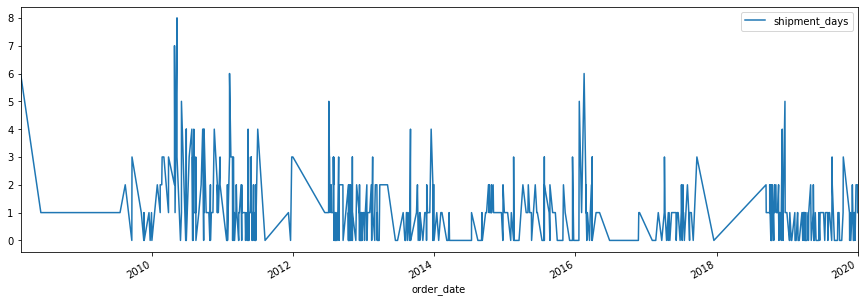

In [118]:
df_ship_diff.plot(kind='line', x=0, y=1, figsize = (15,5))
plt.savefig('ship_diff_all_line.png')
ship_diff_all_line = 'ship_diff_all_line.png'

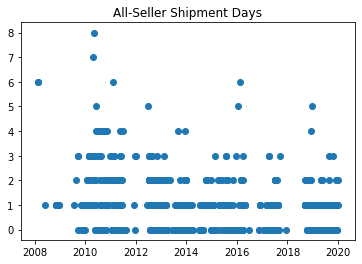

In [119]:
plt.scatter(x=df_ship_diff['order_date'], y=df_ship_diff['shipment_days'])
plt.title('All-Seller Shipment Days')
#plt.show()
plt.savefig('ship_diff_all_scatt.png')
ship_diff_all_scatt = 'ship_diff_all_scatt.png'

In [120]:
df_ship_diff_2 = df_ship_diff[df_ship_diff.seller == 'Amazon.com']
df_ship_diff_2

,order_date,shipment_days,seller
0,2008-02-19,6,Amazon.com
1,2008-02-19,6,Amazon.com
2,2008-06-03,1,Amazon.com
7,2008-12-13,1,Amazon.com
8,2008-12-13,1,Amazon.com
...,...,...,...
776,2019-12-14,1,Amazon.com
779,2019-12-19,0,Amazon.com
780,2019-12-24,2,Amazon.com
781,2020-01-01,2,Amazon.com


In [121]:
df_ship_diff_2['shipment_days'].describe()

count    454.000000
mean       1.039648
std        1.093111
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: shipment_days, dtype: float64

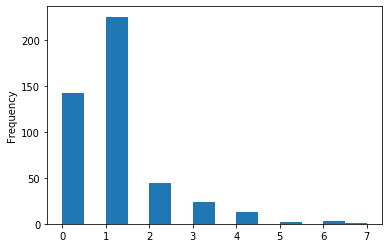

In [122]:
df_ship_diff_2['shipment_days'].plot(kind='hist', bins = 14)
plt.savefig('ship_diff_amzn_bar.png')
ship_diff_amzn_bar = 'ship_diff_amzn_bar.png'

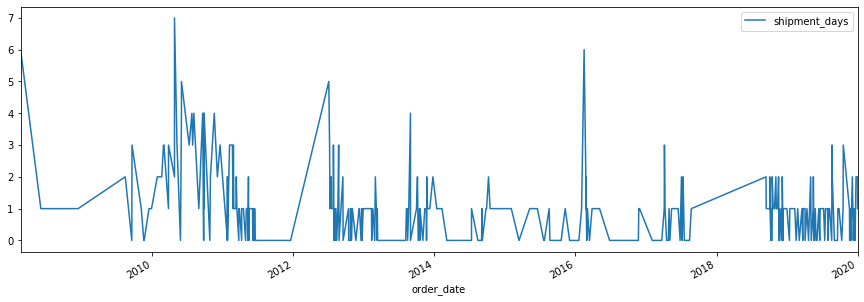

In [123]:
df_ship_diff_2.plot(kind='line', x=0, y=1, figsize = (15,5))
plt.savefig('ship_diff_amzn_line.png')
ship_diff_amzn_line = 'ship_diff_amzn_line.png'

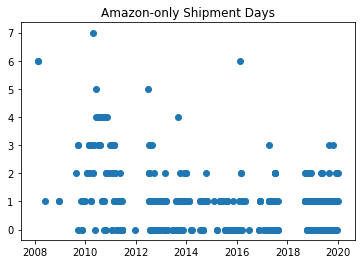

In [124]:
plt.scatter(x=df_ship_diff_2['order_date'], y=df_ship_diff_2['shipment_days'])
plt.title('Amazon-only Shipment Days')
#plt.show()
plt.savefig('ship_diff_amzn_scatt.png')
ship_diff_amzn_scatt = 'ship_diff_amzn_scatt.png'

In [125]:
df_ship_diff_3 = df_ship_diff[df_ship_diff.seller != 'Amazon.com']
df_ship_diff_3

,order_date,shipment_days,seller
3,2008-11-06,1,SimplyBeautiful
4,2008-11-06,1,SimplyBeautiful
5,2008-11-06,1,SimplyBeautiful
6,2008-11-06,1,SimplyBeautiful
9,2009-07-18,1,Nature and Herbs
...,...,...,...
765,2019-10-18,1,"Ancestral Supplements, LLC"
772,2019-12-03,1,Change Tree
775,2019-12-13,0,VICSEED
777,2019-12-18,1,MKOAWA


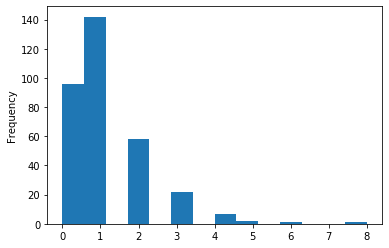

In [126]:
df_ship_diff_3['shipment_days'].plot(kind='hist', bins = 14)
plt.savefig('ship_diff_other_bar.png')
ship_diff_other_bar = 'ship_diff_other_bar.png'

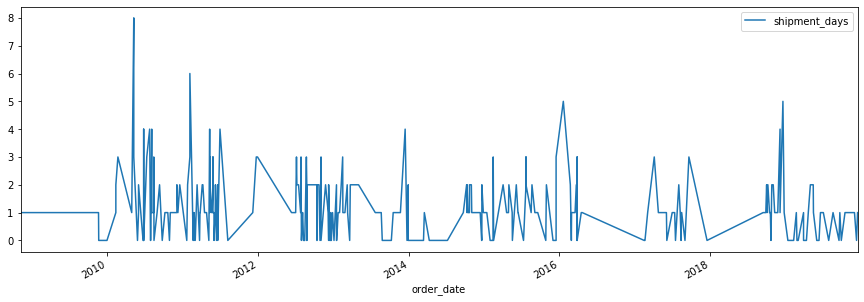

In [127]:
df_ship_diff_3.plot(kind='line', x=0, y=1, figsize = (15,5))
plt.savefig('ship_diff_other_line.png')
ship_diff_other_line = 'ship_diff_other_line.png'

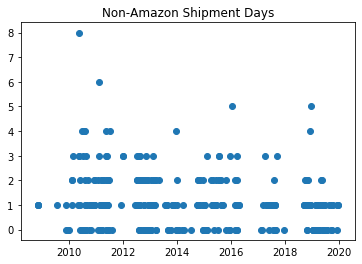

In [128]:
plt.scatter(x=df_ship_diff_3['order_date'], y=df_ship_diff_3['shipment_days'])
plt.title('Non-Amazon Shipment Days')
#nodays = plt.show()
plt.savefig('ship_diff_other_scatt.png')
ship_diff_other_scatt = 'ship_diff_other_scatt.png'

In [129]:
import pdfkit

In [130]:
body = f'''
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Amazon Order History</title>
</head>
<body>
    <h1>Spending</h2>
    <p>Annual Total Spending</p>
    <img src="{ann_tot_spend}">
    <br>
    <p>Total Spending by Category</p>
    <img src="{cat_tot_spend}">
    <br>
    <p>Share of Spending by Category</p>
    <img src="{share_purchase}">  
    <br>
    <p>Total Spending by Seller</p>
    <img src="{pie_seller}">
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <h1>Order Fulfillment</h1>
    <p>Days to Ship All Sellers</p>
    <img src="{ship_diff_all_bar}">
    <br>
    <p>Days to Ship Amazon</p>
    <img src="{ship_diff_amzn_bar}">
    <br>
    <p>Days to Ship Other</p>
    <img src="{ship_diff_other_bar}">
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <h1>Order Fulfillment</h1>
    <p>Days to Ship All Sellers</p>
    <img src="{ship_diff_all_scatt}">
    <br>
    <p>Days to Ship Amazon</p>
    <img src="{ship_diff_amzn_scatt}"> 
    <br>
    <p>Days to Ship Other</p>
    <img src="{ship_diff_other_scatt}"> 
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <h1>Order Fulfillment</h1>
    <p>Days to Ship All Sellers</p>
    <img src="{ship_diff_all_line}">    
    <br>
    <p>Days to Ship Amazon</p>
    <img src="{ship_diff_amzn_line}">    
    <br>
    <p>Days to Ship Other</p>
    <img src="{ship_diff_other_line}">
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <h1>Carriers</h1>
    <p>Total Shipments by Carrier</p>
    <img src="{carrier_num}">
    <br>
    <p>Average Price of Items by Carrier</p>
    <img src="{carrier_price}">
    <br>
    <p>Total Shipments by Month</p>
    <img src="{month_trend}">  
    
</body>
</html>'''


In [131]:
with open("amazon_orders.html", "w") as f:
    f.write(body)

In [132]:
#pdfkit.from_file("amazon_orders.html", "amazon_purchase_history.pdf")

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True